<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
np.random.normal(loc=5, scale=2, size=10)


array([5.82473993, 1.98650497, 3.1176082 , 4.36364545, 4.24480625,
       2.81375736, 4.87627683, 4.69422012, 6.37359467, 5.89950273])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

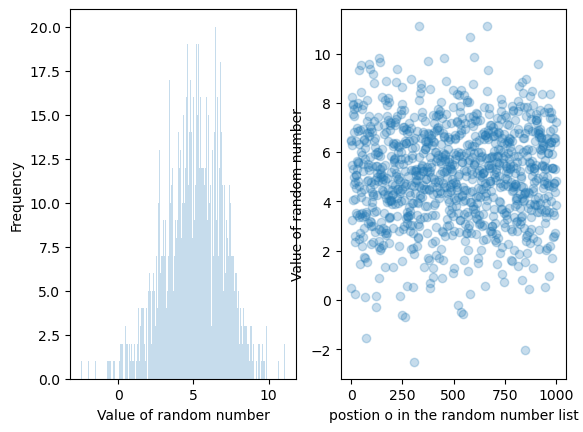

In [2]:
from matplotlib import pyplot as plt
n=1_000

random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax=plt.subplots(nrows=1, ncols=2)

axis=ax[0]
axis.hist(random_numbers, bins=200, alpha=.25)
axis.set_xlabel('Value of random number')
axis.set_ylabel('Frequency')

axis=ax[1]
axis.scatter(range(n), random_numbers,alpha = .25 )
axis.set_xlabel("postion o in the random number list")
axis.set_ylabel('Value of random number')


### 1.3 68%?

In [3]:
n=10_000
mean, sd = 5, 2

random_numbers = np.random.normal(loc=mean, scale = sd, size =n)
mask = (random_numbers >= mean - sd) & (random_numbers <=mean+sd)

print(f'% of points between 1std.dev from the mean : {np.sum(mask)/n*100:.2f}')


% of points between 1std.dev from the mean : 67.69


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [4]:

# The particle is restricted to moving in 1D. It only moves in steps either one unit to the left or one to the right
# Choice of left or right is selected randomly, where Q = (1-P) P=p(right) and Q=p(left)


### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D randomf walk with p=0.5')

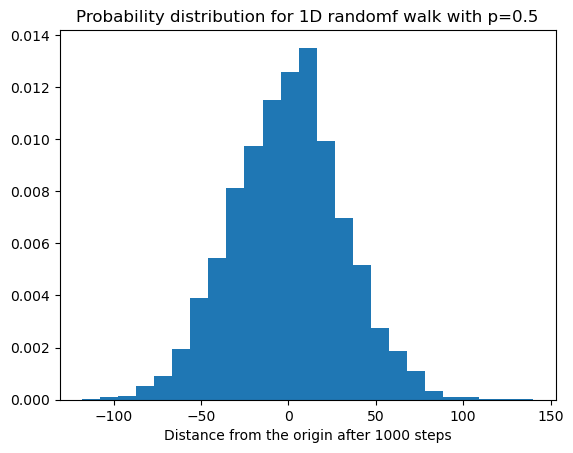

In [5]:
import numpy.random as rnd
def brown_1d(prob_right, no_of_steps):
    '''
    The function returns the final position of the particle after 
    a certain number of steps.
    prob_right = probability of going right
    '''

    step_size = 1
    x=0
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:
            x+= step_size
        else:
            x-= step_size
        
    return x

no_of_steps, p = 1000, .5
repeats =10000

results=[brown_1d(no_of_steps=no_of_steps, prob_right=p)
        for _ in range(repeats)]

plt.hist(results, bins=25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D randomf walk with p={p}')


### 1.3 What does theory say?

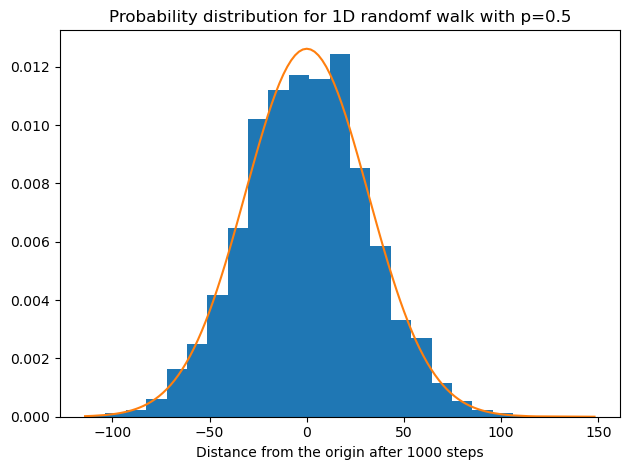

In [6]:
no_of_steps, p = 1000, .5
repeats =10000

results=[brown_1d(no_of_steps=no_of_steps, prob_right=p)
        for _ in range(repeats)]

plt.hist(results, bins=25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D randomf walk with p={p}')

def normal(x, m=0, s=1):

    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1-p
mean = no_of_steps * (p - prob_left) #M=N(q-p)
sd = np.sqrt(4*no_of_steps*p*prob_left)
x = np.unique(results)

plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.tight_layout()

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [7]:

N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high = 1, size = 1)
    y = rnd.uniform(low=-1, high = 1, size = 1)
    r = np.sqrt(x**2 + y**2)
    
    if r<=1:
        N_green +=1

4* N_green/N_total

3.13024

### 2.3 A better solution

In [8]:
N_total=1_000_000
x = rnd.uniform(low=-1, high=1, size=N_total)
y = rnd.uniform(low=-1, high=1, size=N_total)
N_green=np.sum((np.sqrt(x**2+y**2)<=1))

4* N_green/N_total


3.141696

### 2.4 A smarter solution

In [9]:

N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141828

## Exercise 1 :  Vital Stats of Random π

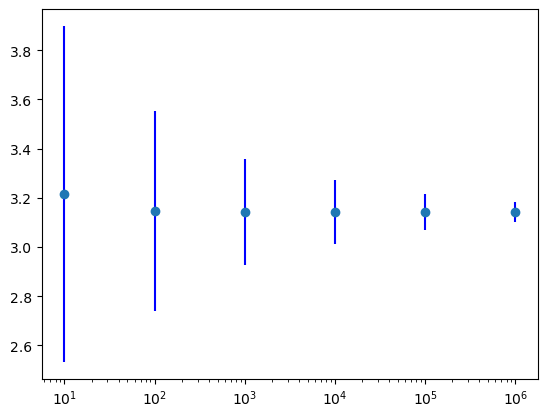

In [10]:
n=100_000_000
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    n_green=np.sum((x**2+y**2) <= 1)
    return 4 * (n_green / n)
estimate_pi(n)

x = [estimate_pi(n=10000) for _ in range (1_00)]
np.mean(x)
np.std(x)

mean_pi = []
sd_pi = []
N = []
for m in range (1, 7):
    n=10**m
    pii = [estimate_pi(n) for _ in range (1_00)]
    mean_pi.append(np.mean(pii))
    sd_pi.append(np.std(pii))
    N.append(n)
mean_pi, sd_pi, N

plt.errorbar(N, mean_pi, yerr=np.sqrt(sd_pi), fmt='o', ecolor='blue')
plt.xscale('log')

In [11]:
n=10**m
pii = [estimate_pi(n) for n in range(1, 7) for _ in range (100)]
mean_pi.append(np.mean(pii))
sd_pi.append(np.std(pii))
N.append(n)
mean_pi, sd_pi, N

([3.216,
  3.1471999999999998,
  3.1423600000000005,
  3.1415,
  3.1419423999999996,
  3.1415159999999998,
  3.1622222222222223],
 [0.46620167309867094,
  0.16481553324853818,
  0.045558208920017954,
  0.017096561057709826,
  0.005228788984076524,
  0.0015875305099430348,
  1.030689569004325],
 [10, 100, 1000, 10000, 100000, 1000000, 1000000])